# Amazon USA Products 2023 (1.4M Products)

## Dataset
Due to the dataset exceeding 100 MiB which GitHub blocks files larger than 100 MiB please see the below link to the full dataset.

https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products/data

The Amzon Products Dataset 2023 was Scraped from Sep 2023

Project Goal:
EDA with python

also create tableau dashboard.

Planning:

Conduct EDA for Amazon products
join the two datasets together.
identify patterns & trends 
explore  any correlations in the data
viz findings



# Project Objective
project ideas draft:
- which cateogires drive the most sales?
- Do customers ratings and reviews impact sales?
- Identify which niches are the easiest to make sales in?
- do customer ratings have much impact on sales?


Final objectives:
- <b>Analyse Sales Performance Across Categories:</b> Identify which product categories contribute the most to total sales.

- <b>Assess the Impact of Customer Ratings & reviews on Sales:</b> Investigate whether higher-rated products generate more sales compared to lower-rated ones.

- <b>Determine Profitable Niches:</b> Explore which niches have the highest conversion rates and consistent sales trends.

# Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import csv

# Step 2: Load Datasets

In [2]:
# loading datasets
categories_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\\Projects\\Amazon Products 2023\\amazon_categories.csv")
products_df = pd.read_csv("C:\\Users\\Tim\\OneDrive\\Documents\Projects\\Amazon Products 2023\\amazon_products.csv")

In [3]:
# view first few rows of each dataset
categories_df.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [4]:
products_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


# Step 3: Data Cleaning

In [5]:
# Check the number of rows and columns.
cat_rows = categories_df.shape[0] # Gives num of rows
cat_col = categories_df.shape[1] # gives num of cols
prod_row = products_df.shape[0] # Gives num of rows
prod_col = products_df.shape[1] # gives num of cols

print("categories_df Row Count: " + str(cat_rows))
print("cateogires_df column Count: " + str(cat_col))

print("products_df Row Count: " + str(prod_row))
print("products_df Column Count: " + str(prod_col))

categories_df Row Count: 248
cateogires_df column Count: 2
products_df Row Count: 1426337
products_df Column Count: 11


In [6]:
# Identify any missing values
print(categories_df.isnull().sum())
print(products_df.isnull().sum())

id               0
category_name    0
dtype: int64
asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [7]:
# find the null value in products_df 
missing_title = products_df[products_df['title'].isnull()]
print(missing_title)

               asin title                                             imgUrl  \
1206102  B00758A9CE   NaN  https://m.media-amazon.com/images/I/71+50RU8o2...   

                                   productURL  stars  reviews  price  \
1206102  https://www.amazon.com/dp/B00758A9CE    5.0        0  33.08   

         listPrice  category_id  isBestSeller  boughtInLastMonth  
1206102        0.0           19         False                  0  


In [8]:
# Use other information to try fill the missing title name.
prod_filter = products_df.loc[products_df['category_id'] == 19]
print(prod_filter)

               asin                                              title  \
1198836  B09DH98QL2  Chemical Guys HOL363 16-Piece Arsenal Builder ...   
1198837  B0C6DZZ4MN  Car Wash Kit -Car Wash Cleaning Kit Car Interi...   
1198838  B0CBZ12S15  Car Vacuum Cleaner High Power Cordless, 16000p...   
1198839  B08BRJHJF9  Microfiber Cleaning Cloth Grey - 12 packs 16"x...   
1198840  B06ZY896ZM  ThisWorx Car Vacuum Cleaner - Car Accessories ...   
...             ...                                                ...   
1207490  B093Q3RKB5  Car Cleaning Kit Buffing Pads Sponge Waxing an...   
1207491  B093CLN9YG  VViViD Essentials Car Cleaning, Waxing and Pol...   
1207492  B08RCV9DTM  Tires and Plastic Restoration - Professional C...   
1207493  B08HRMRJ95  Cleaning Washcloth Towels - Large 27" x 16" Mi...   
1207494  B08GG9W1WJ                Collinite 845 476s Double 520 Combo   

                                                    imgUrl  \
1198836  https://m.media-amazon.com/images/I/81xa

In [9]:
# Update column width to see full string of title column to make sure product title is being named 
# the same as what is shown in the productURL.
pd.set_option('display.max_colwidth', None)
with pd.option_context('display.max_colwidth', None):
    print(prod_filter)

               asin  \
1198836  B09DH98QL2   
1198837  B0C6DZZ4MN   
1198838  B0CBZ12S15   
1198839  B08BRJHJF9   
1198840  B06ZY896ZM   
...             ...   
1207490  B093Q3RKB5   
1207491  B093CLN9YG   
1207492  B08RCV9DTM   
1207493  B08HRMRJ95   
1207494  B08GG9W1WJ   

                                                                                                                                                                                                       title  \
1198836  Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)   
1198837                                          Car Wash Kit -Car Wash Cleaning Kit Car Interior Detailing Kit with Car Wash Foam Gun,Microfiber Sponge Car Care Kit,Tire Brush, Car Wash Kit with Foam Gun   
1198838          Car Vacuum Cleaner High Power Cordless, 16000pa Small Handheld Vacuum for Car with

In [10]:
# Update Null value with product name from productURL.
# productURL is https://www.amazon.com/dp/B09DH98QL2?th=1

# Update the missing value with the given string from productURL
products_df['title'].fillna("Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)", inplace=True)

# Check if NULL value is replaced
print(products_df[products_df['title'].isnull()]) # should return an emptpy dataframe

# double checking
print(products_df.loc[products_df['asin'] == 'B00758A9CE']) # using unique asin from above

C:\Users\Tim\AppData\Local\Temp\ipykernel_22972\2887489447.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['title'].fillna("Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)", inplace=True)


Empty DataFrame
Columns: [asin, title, imgUrl, productURL, stars, reviews, price, listPrice, category_id, isBestSeller, boughtInLastMonth]
Index: []
               asin  \
1206102  B00758A9CE   

                                                                                                                                                                                                       title  \
1206102  Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)   

                                                                 imgUrl  \
1206102  https://m.media-amazon.com/images/I/71+50RU8o2L._AC_UL320_.jpg   

                                   productURL  stars  reviews  price  \
1206102  https://www.amazon.com/dp/B00758A9CE    5.0        0  33.08   

         listPrice  category_id  isBestSeller  boughtInLastMonth  
1206102        0.0      

In [11]:
# Verify changes to check if anymore NULL values in products_df
print(products_df.isnull().sum())

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


#### Next Steps:
1. <b>Remove duplicates IDs:</b> Now that there are no NULL values in the dataset, the next step is to eliminate any duplicate entries in the 'id' column of categories_df to ensure data integrity.

2. <b>Validate Matching Keys:</b> Before merging the datasets, we need to verify that the 'id' values in categories_df align correctly with the 'category_id' values in products_df. This step ensures a smooth and accurate join.

3. <b>Merge the Datasets:</b> Once the key columns are validated, we will combine categories_df and products_df by joining on 'id' (from categories_df) and 'category_id' (from products_df). This will integrate category information with product details for further my final analysis and dataset used for my tableau dashboard.

In [12]:
# Check for duplicates in categories_df
categories_df.duplicated().sum()

np.int64(0)

In [13]:
products_df.duplicated().sum()

np.int64(0)

In [14]:
# Comparing id column from amazon_categories.csv to product_id in amazon_products.csv to ensure these categories are matching
cat_filter = categories_df.loc[categories_df['id'] == 19]
print(cat_filter)

prod_filter = products_df.loc[products_df['category_id'] == 19, ['title', 'category_id']]
print(prod_filter)

    id category_name
18  19      Car Care
                                                                                                                                                                                                       title  \
1198836  Chemical Guys HOL363 16-Piece Arsenal Builder Ceramic Car Wash & Protection Kit with Big Mouth Max Release Foam Cannon, Bucket and (6) 16 oz Car Care Cleaning Chemicals (Works w/Pressure Washers)   
1198837                                          Car Wash Kit -Car Wash Cleaning Kit Car Interior Detailing Kit with Car Wash Foam Gun,Microfiber Sponge Car Care Kit,Tire Brush, Car Wash Kit with Foam Gun   
1198838          Car Vacuum Cleaner High Power Cordless, 16000pa Small Handheld Vacuum for Car with Blower, Powerful Hand Vacuum Rechargeable, Type-C Fast Charging, Portable Car Vacuum for Car/Home/Office   
1198839      Microfiber Cleaning Cloth Grey - 12 packs 16"x16" - High Performance - 1200 Washes, Ultra Absorbent Towels Weave 

In [15]:
uniquie_prod_id = products_df['category_id'].nunique()
print("Total unique category_id in products_df: " + str(uniquie_prod_id))

unique_cat_id = categories_df['id'].nunique()
print("Total unique id in categories_df: " + str(unique_cat_id))

Total unique category_id in products_df: 248
Total unique id in categories_df: 248


After comparing both categories_df & products_df datasets we can see that 'id' in categories_df matches the 'category_id' in the products_df after looking at specific cateogory names and product titles.

In [16]:
# Merge products_df with categories_df using a left join
merged_df = products_df.merge(categories_df, left_on = 'category_id', right_on = 'id', how = 'left')

# Checking if all categories have been successfully merged:
print(merged_df[['category_id','category_name']].drop_duplicates())

         category_id                           category_name
0                104                               Suitcases
924              110                          Men's Clothing
17994            245  Xbox 360 Games, Consoles & Accessories
21427            114                             Men's Shoes
38519            112                       Men's Accessories
...              ...                                     ...
1387414          204       Paint, Wall Treatments & Supplies
1392744          106                          Rain Umbrellas
1394518          105                      Travel Accessories
1414536          137     Stationery & Gift Wrapping Supplies
1414992           26           Car Electronics & Accessories

[248 rows x 2 columns]


the results shown above match the Total unique category_id in products_df: 248

In [17]:
# Dropping redundant columns.
merged_df.drop(columns=['id','imgUrl','productURL'], inplace=True)

In [18]:
# Preview merged_df to see if id column is dropped & if category_name column added.
merged_df.tail()

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Mesh Snap Back Trucker Hat,4.2,0,14.95,0.00,112,False,0,Men's Accessories
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Brim Fitted Hat,4.4,0,33.99,0.00,112,False,0,Men's Accessories
1426334,B07X1MVNT1,"[4 Pack] Adjustable Eyeglasses and Sunglasses Holder Strap Cord for Sports, Anti-slippery Eyeglass Retainer with One Free Microfiber Cleaning Cloths(4 Pack)",3.6,0,8.54,0.00,112,False,0,Men's Accessories
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,4.5,0,54.36,57.39,112,False,0,Men's Accessories
1426336,B07GH67QC8,in Hoc Signo Vinces Knights Templar Masonic Embroidered Black Adjustable Baseball Cap,4.9,0,18.79,0.00,112,False,0,Men's Accessories


To help make my analysis easier and gather insights on whether: 
1. find out total products which are bestsellers
1. Group by isBestSeller by category_name


1. Sales Performance Across Categories
2. Impact of Customer Ratings & reviews on Sales

I will aggregate these fields and merge the aggegrated data & newly merged merged_df into a final dataset

In [19]:
# 1. Find out total counts of best sellers products and not best sellers
bestSeller_cnt = merged_df['isBestSeller'].value_counts()
print(bestSeller_cnt)
# Group first then count how many best seller products by category

isBestSeller
False    1417817
True        8520
Name: count, dtype: int64


In [20]:
# Convert bestSeller_cnt to an int
# This will make it easier when doing analysis or plotting.
merged_df['isBestSeller'] = merged_df['isBestSeller'].astype(int)
merged_df.head()

,asin,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch",4.5,0,139.99,0.00,104,0,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue,4.5,0,169.99,209.99,104,0,1000,Suitcases
2,B07XSCCZYG,"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch",4.6,0,365.49,429.99,104,0,300,Suitcases
3,B08MVFKGJM,"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)",4.6,0,291.59,354.37,104,0,400,Suitcases
4,B01DJLKZBA,"Winfield 2 Hardside Expandable Luggage with Spinner Wheels, Checked-Large 28-Inch, Deep Blue",4.5,0,174.99,309.99,104,0,400,Suitcases


In [21]:
# check if isBestSeller column has been converted correctly to an int
bestSeller_cnt = merged_df['isBestSeller'].value_counts()
print(bestSeller_cnt)

isBestSeller
0    1417817
1       8520
Name: count, dtype: int64


Create a new dataframe which contains the record of Not Best Seller and Best Seller

In [22]:
is_bestseller_data = pd.DataFrame({'isBestSeller': bestSeller_cnt.index, 'Count': bestSeller_cnt.values})
print(is_bestseller_data)

   isBestSeller    Count
0             0  1417817
1             1     8520


In [23]:
# Create custom label
seller_label = {0: "Not Bestseller", 1: "Bestseller"}
is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(seller_label)
print(is_bestseller_data)
# use output to create graph for isBestSeller

     isBestSeller    Count
0  Not Bestseller  1417817
1      Bestseller     8520


### 3. Now that the cleaning of the data (step 3) has been completed we can visualise the and identify and answer useful insights from the data.

# Step 4 - Asking and answering interesting questions.

The project objective was to find answers the following questions.
1. <b>Analyse Sales Performance Across Categories:</b> Identify which product categories contribute the most to total sales.

2. <b>Assess the Impact of Customer Ratings & reviews on Sales:</b> Investigate whether higher-rated products generate more sales compared to lower-rated ones.
-- Change this to total sales...

3. <b>Determine Profitable Niches:</b> Explore which niches have the highest conversion rates and consistent sales trends.

### 4.1 How many products are Best Sellers?

-  Display on a piechart which shows the percentage of how many products from Amazon 2023 are either BestSellers and NotBestSellers

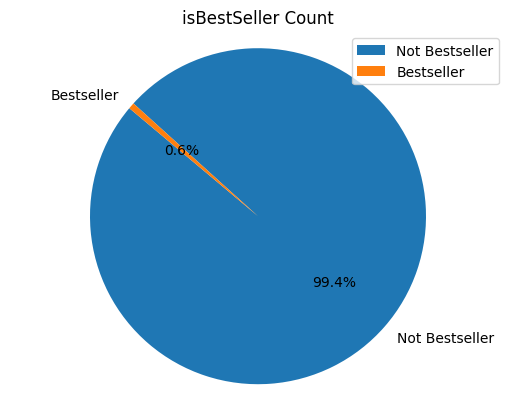

In [24]:
# Count the occurance of True and False in the 'BestSeller' Column
bestSeller_cnt = merged_df['isBestSeller'].value_counts()

# Create a DataFrame for the pie chart
is_bestseller_data = pd.DataFrame({'isBestSeller': bestSeller_cnt.index, 'Count': bestSeller_cnt.values})

# Define labels
seller_label = {0: "Not Bestseller", 1: "Bestseller"}

# Replace values in dataframe with custom labels
is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(seller_label)

# Create and display the Pie Chart
plt.pie(
    is_bestseller_data['Count']                    # The sizes of each pie slice
    , labels=is_bestseller_data['isBestSeller']    # The labels: "Bestseller", "Not Bestseller"
    , autopct='%1.1f%%'                            # show percentage on pie
    , startangle=140                               #  start angle for better visual
)
plt.title("isBestSeller Count")
plt.axis('equal')  # Keeps the pie chart circular
plt.legend(loc='upper right')
plt.show()


- The bestSeller products are 0.6%
- Not BestSeller products are  99.4%
- Total count of 8520 for BestSeller
- Total count of 1417817 for Not BestSeller

### 4.2 How many of these BestSeller products were purchased in the last month?

In [25]:
# Unique value of Items boughtInLastMonth
merged_df['boughtInLastMonth'].nunique()

30

In [26]:
# Group BestSeller with boughtInLastMonth
sum_boughtInLastMonth = merged_df.groupby(['isBestSeller'])['boughtInLastMonth'].sum()
print(sum_boughtInLastMonth)

isBestSeller
0    182702500
1     19812100
Name: boughtInLastMonth, dtype: int64


- Visualise our findings onto a graph to clearly see how many bestSellers were in the boughtInLastMonth

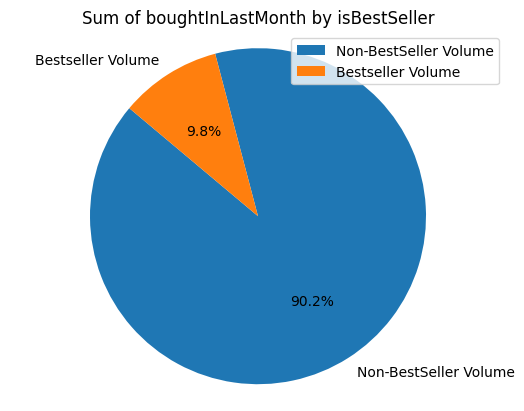

In [27]:
# Calculate the sum of boughtInlastMonth for IsBestSeller and Group this
sum_boughtInLastMonth = merged_df.groupby(['isBestSeller'])['boughtInLastMonth'].sum()

# Define custom labels
custom_labels = {0: "Non-BestSeller Volume", 1: "Bestseller Volume"}

# Map index to custom labels
labels = [custom_labels[i] for i in sum_boughtInLastMonth.index]

# Create and display the Pie Chart
plt.pie(
    sum_boughtInLastMonth                   
    , labels=labels                  # Show the string labels
    , autopct='%1.1f%%'                            # show percentage on pie
    , startangle=140                               #  start angle for better visual
)
plt.title("Sum of boughtInLastMonth by isBestSeller")
plt.axis('equal')  # Keeps the pie chart circular
plt.legend(loc='upper right')
plt.show()

- The above pie chart shows the volume of bestSeller products and NotBestSeller products which were bought in the last month.
- 9.8% of products were bought by bestSellers
- 90.2% of products were bought by Non-BestSellers

### 4.3 Calculate total sales performance in the last month (boughtInLastMonth)?

In [28]:
# Group category_name and BoughtInLastMonth and sum total sales
total_cat_sales = merged_df.groupby(['category_name'])['boughtInLastMonth'].sum().reset_index()
total_cat_sales

,category_name,boughtInLastMonth
0,Abrasive & Finishing Products,160300
1,Accessories & Supplies,832100
2,Additive Manufacturing Products,94100
3,Arts & Crafts Supplies,1346550
4,"Arts, Crafts & Sewing Storage",197550
...,...,...
243,Women's Watches,68700
244,"Xbox 360 Games, Consoles & Accessories",15400
245,"Xbox One Games, Consoles & Accessories",35900
246,"Xbox Series X & S Consoles, Games & Accessories",42300


- I have grouped the data by product cateogry name and summed the total sales from last month.

In [29]:
# Lets order the above to show the max sales.
total_cat_sales = total_cat_sales.sort_values(['boughtInLastMonth'], ascending=[False])
total_cat_sales

,category_name,boughtInLastMonth
119,Kitchen & Dining,10432300
83,Hair Care Products,8012850
100,Industrial & Scientific,7093350
97,Household Cleaning Supplies,6875700
188,Skin Care Products,6612150
...,...,...
52,Computer Servers,0
213,Tablet Replacement Parts,0
200,Smart Home: Smart Locks and Entry,0
203,Smart Home: WiFi and Networking,0


In [30]:
# Display the top 20 largest sales last month
top_20_cat_sales = total_cat_sales.nlargest(20, 'boughtInLastMonth')
top_20_cat_sales



,category_name,boughtInLastMonth
119,Kitchen & Dining,10432300
83,Hair Care Products,8012850
100,Industrial & Scientific,7093350
97,Household Cleaning Supplies,6875700
188,Skin Care Products,6612150
86,Health & Household,6138000
220,Toys & Games,5858000
94,Home Storage & Organization,5356200
60,Dog Supplies,4576650
98,Household Supplies,4289000


- The above shows the top 20 Product Cateogies which sold sold the highest in boughtInLastMonth.

<function matplotlib.pyplot.show(close=None, block=None)>

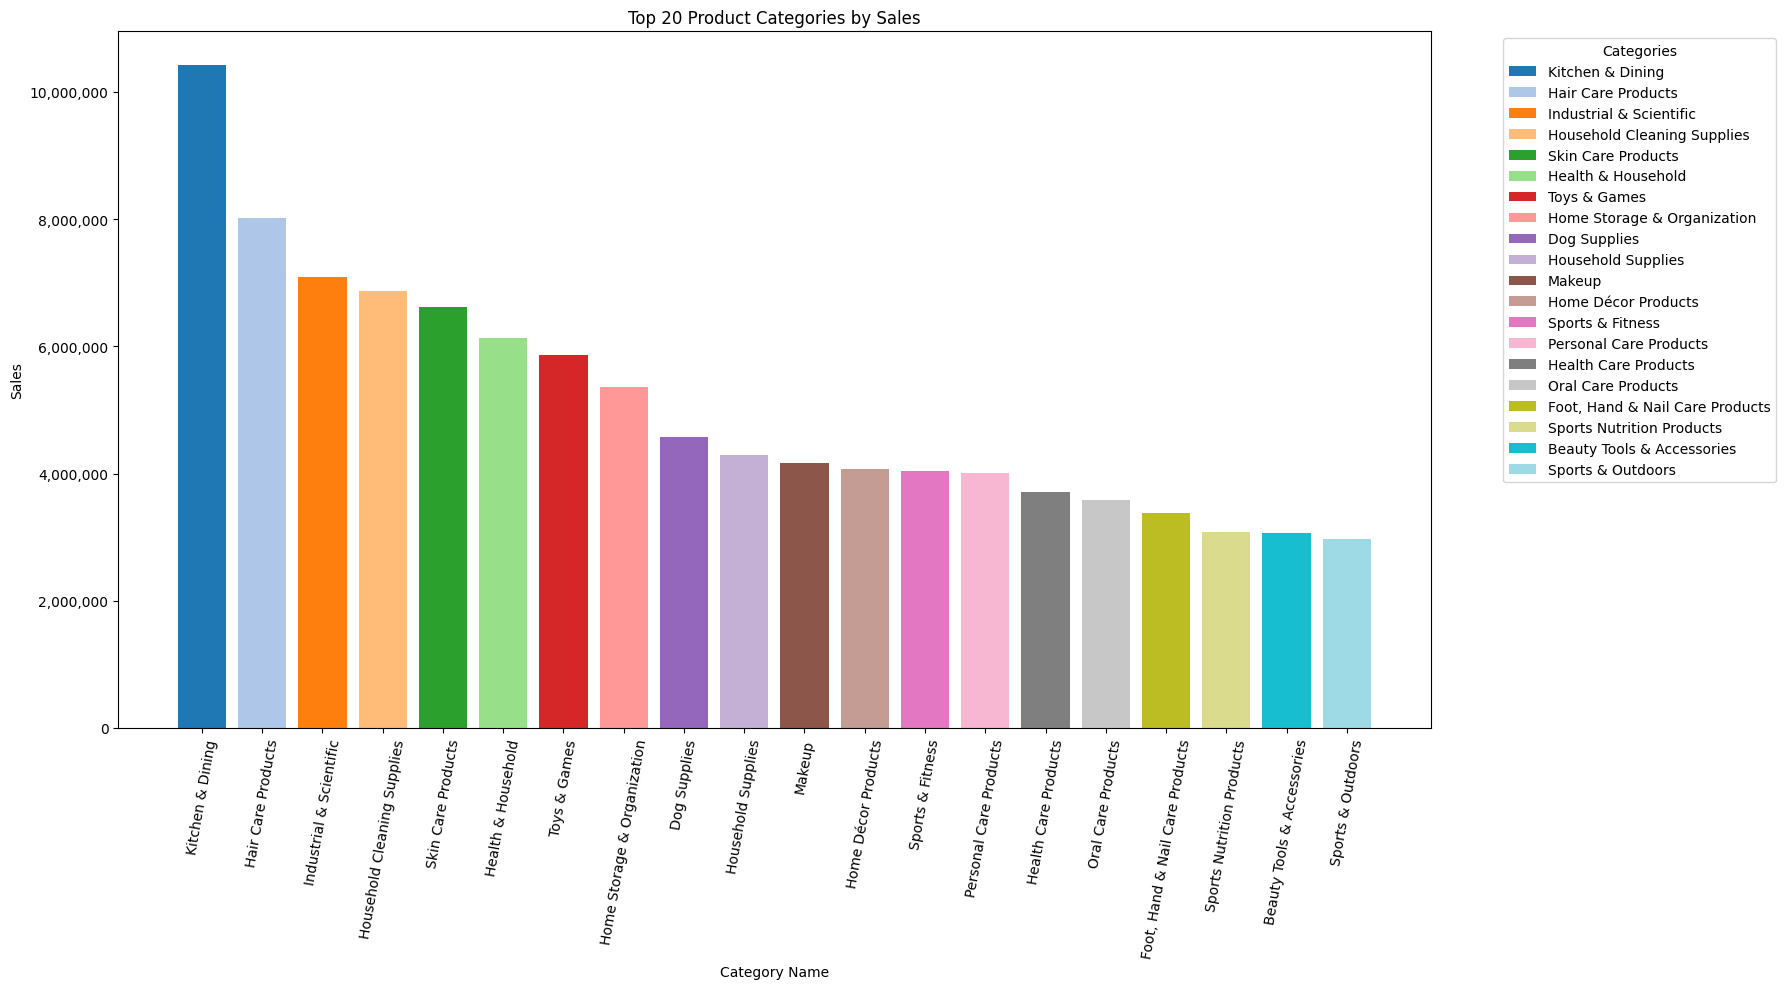

In [ ]:
import matplotlib.ticker as mtick
# Display our findings in a Bar Chart
# Data to use in graph
# Group category_name and BoughtInLastMonth and sum total sales
total_cat_sales = merged_df.groupby(['category_name'])['boughtInLastMonth'].sum().reset_index()
# Lets order the above to show the max sales.
total_cat_sales = total_cat_sales.sort_values(['boughtInLastMonth'], ascending=[False])
# Display the top 20 largest sales last month
top_20_cat_sales = total_cat_sales.nlargest(20, 'boughtInLastMonth')


# Create bar chart
plt.figure(figsize=(18,10)) # makes the chart wider for readability



# Custom colors — 20 different colors
colors = plt.cm.tab20.colors  # You can also try plt.cm.Set3, plt.cm.Pastel1, etc.
# Plot bars and keep a handle to add legend
bars = plt.bar(top_20_cat_sales['category_name'], top_20_cat_sales['boughtInLastMonth'], color=colors)
# Legend with category names
plt.legend(bars, top_20_cat_sales['category_name'], title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')



# formatting
plt.title('Top 20 Product Categories by Sales')
plt.xlabel('Category Name')
plt.ylabel('Sales')
# Format y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=80)  # Rotates category names to prevent overlap
plt.tight_layout()  # Adjust layout to fit x-labels
plt.show

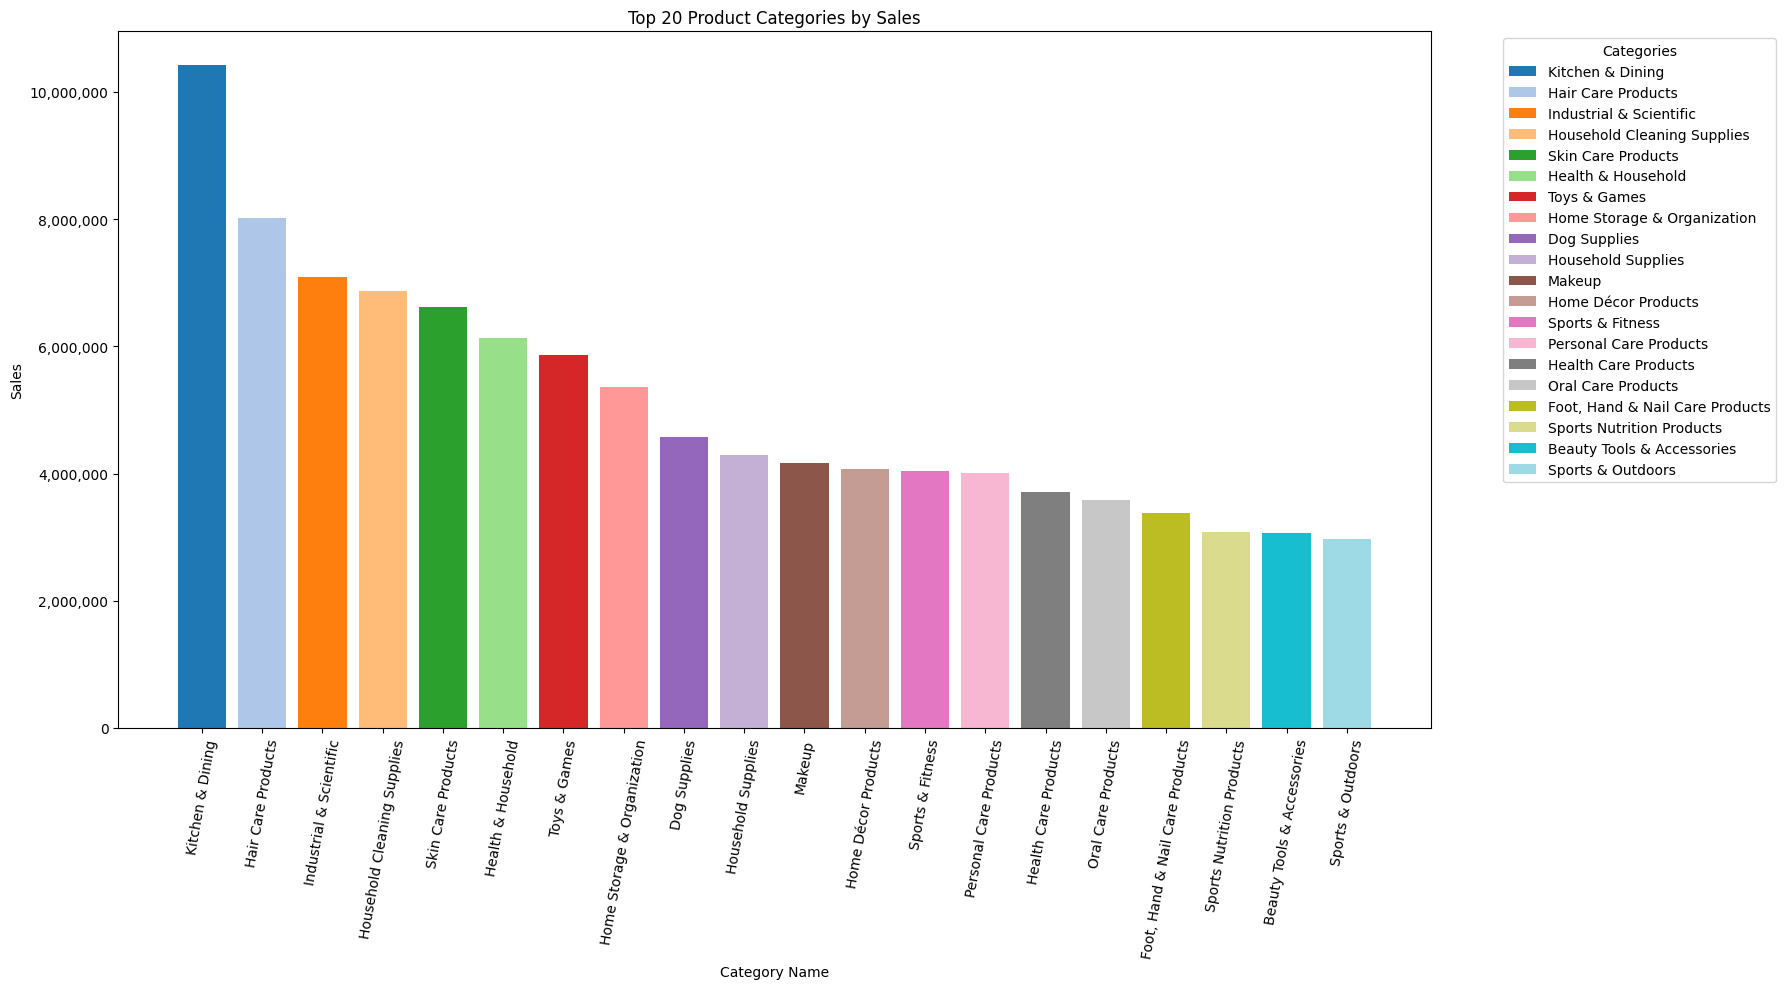

In [55]:
import matplotlib.ticker as mtick

# Data to use in graph
# Group category_name and BoughtInLastMonth and sum total sales
total_cat_sales = merged_df.groupby(['category_name'])['boughtInLastMonth'].sum().reset_index()
# Lets order the above to show the max sales.
total_cat_sales = total_cat_sales.sort_values(['boughtInLastMonth'], ascending=[False])
# Display the top 20 largest sales last month
top_20_cat_sales = total_cat_sales.nlargest(20, 'boughtInLastMonth')

# Create the plot
plt.figure(figsize=(18, 10))

# Custom colors
colors = plt.cm.tab20.colors

# create bar with color
bars = plt.bar(
    top_20_cat_sales['category_name'],
    top_20_cat_sales['boughtInLastMonth'],
    color=colors
)


# Legend with category names
plt.legend(bars, top_20_cat_sales['category_name'], title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting
plt.title('Top 20 Product Categories by Sales')
plt.xlabel('Category Name')
plt.ylabel('Sales')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


- The above graph shows the top selling product category name sold in the last month.
- We can see that Kitchen and & Dining dominates with over 10 Million units sold, followed by Hair Care Products and Industrial & Scientific.
    - These top 3 categories alone represent a significant portion of overall sales, indicating strong consumer demand or effective marketing in these areas.
- There is a cateogry overlap in Personal & Health care:
    - Several mid-to-low-ranking categories such as Skin Care Products, Health & Household, Personal Care Products, and Health Care Products point to a saturated but consistently performing market in the personal and health care space, warranting further segmentation analysis.

### 4.4. Calculate Revenue per product

- We are going to calculate total revenue generated for each product purchased on Amazon US.
- To determine this, we will use the following formula:
    - Revenue = Price x Quantity Sold (boughtInLastMonth)
- This calculation will give us the total sales volume for each product, representing the total amount spent by customers during the last month.

In [ ]:
# Calculate Total Revenue for per product
# price * boughtInLastMonth

### 4.4.Calculate the total money volume for the whole dataset.

In [33]:
# Aggregate ratings and reviews

In [34]:
# Aggregate tototal sales per cat

In [35]:

# check for duplicates based off id & product_id - done
# this includes checking for dup rows  in both datasets df.duplicated().sum() - done


# identify any missing values - done
# df.info() to see column type
# use describe to get more info
# If match we can join these two tables together making it easier to work with. - done 
# Then compare product_id and id to see if these cats match. this is last for sanity check to make sure. -done
# join 2 datasets
# drop columns which wont be using - done

# once have all data together check df.info() & df.describe() too see if need to convert any values 

# New plan:
# find best selling products by category.
# Idenfitying the higest Selling products on Amazon.
# pick one of the following
    # Identifying the product category which generates the high volume of money.
    # Identifying the highly rated products.

# Tues 
# - Graph findings
# 1. convert isbestseller from boolean to int (1,0)
# 2. # Aggregate ratings and reviews
# 3. # Aggregate tototal sales per cat